# Iris Classification

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [150]:
iris = pd.read_csv("iris.csv")
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [121]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [122]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [123]:
n = 50 #number of times to run model

## Logistic Regression

In [124]:
accuracy = 0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris['species'], test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    accuracy += accuracy_score(y_test,predictions)
print("Accuracy: ", accuracy/n)

Accuracy:  0.9626666666666666


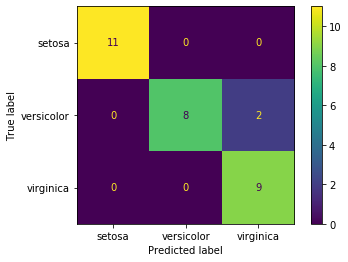

In [125]:
plot_confusion_matrix(logmodel,X_test,y_test)

**Based on the confusion matrix, this model is fairly accurate because it only a few iris species are incorrectly labeled.**

## k-Nearest Neighbors

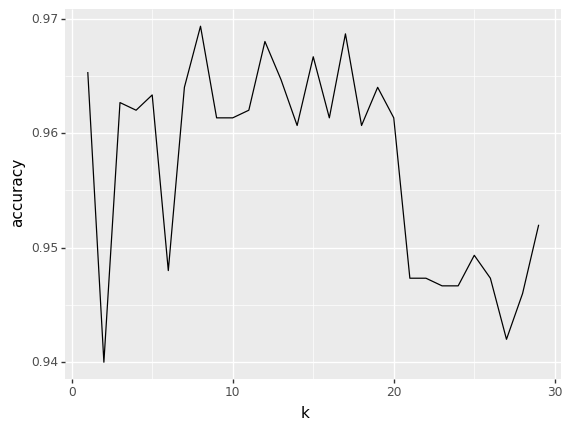

<ggplot: (298948893)>

In [134]:
accuracy_scores = []
k = []
for i in range(1,30):
    accuracy = 0
    for j in range(n):
        neigh=KNeighborsClassifier(n_neighbors=i)
        X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris['species'], test_size=0.2)
        neigh.fit(X_train,y_train)
        predictions = neigh.predict(X_test)
        accuracy += accuracy_score(y_test,predictions)
    k.append(i)
    accuracy_scores.append(accuracy/n)
df = pd.DataFrame({'k':k,'accuracy':accuracy_scores})
ggplot(df,aes(x='k',y='accuracy'))+geom_line()

**Best accuracy when number of neighbors is equal to 14**

In [143]:
neigh=KNeighborsClassifier(n_neighbors=14)
accuracy = 0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris['species'], test_size=0.2)
    neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    accuracy += accuracy_score(y_test,predictions)
print("Accuracy: ", accuracy/n)

Accuracy:  0.9706666666666663


## Decision Trees

**Advantages:** 
**Disadvantages:** 

In [136]:
accuracy = 0
for i in range(n):
    X_train,X_test,Y_train,Y_test = train_test_split(iris.iloc[:,0:4], iris['species'],test_size=0.2)
    clf = DecisionTreeClassifier(random_state=1)
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    accuracy += accuracy_score(Y_test,pred)
print("Accuracy: ", accuracy/n)

Accuracy:  0.9353333333333331


In [151]:
export_graphviz(
    clf,
    out_file = "iris_DT.dot",
    feature_names = iris.iloc[:,0:4].columns,
    class_names = ["setosa","versicolor","virginica"],
    filled = True,
    rounded = True
)

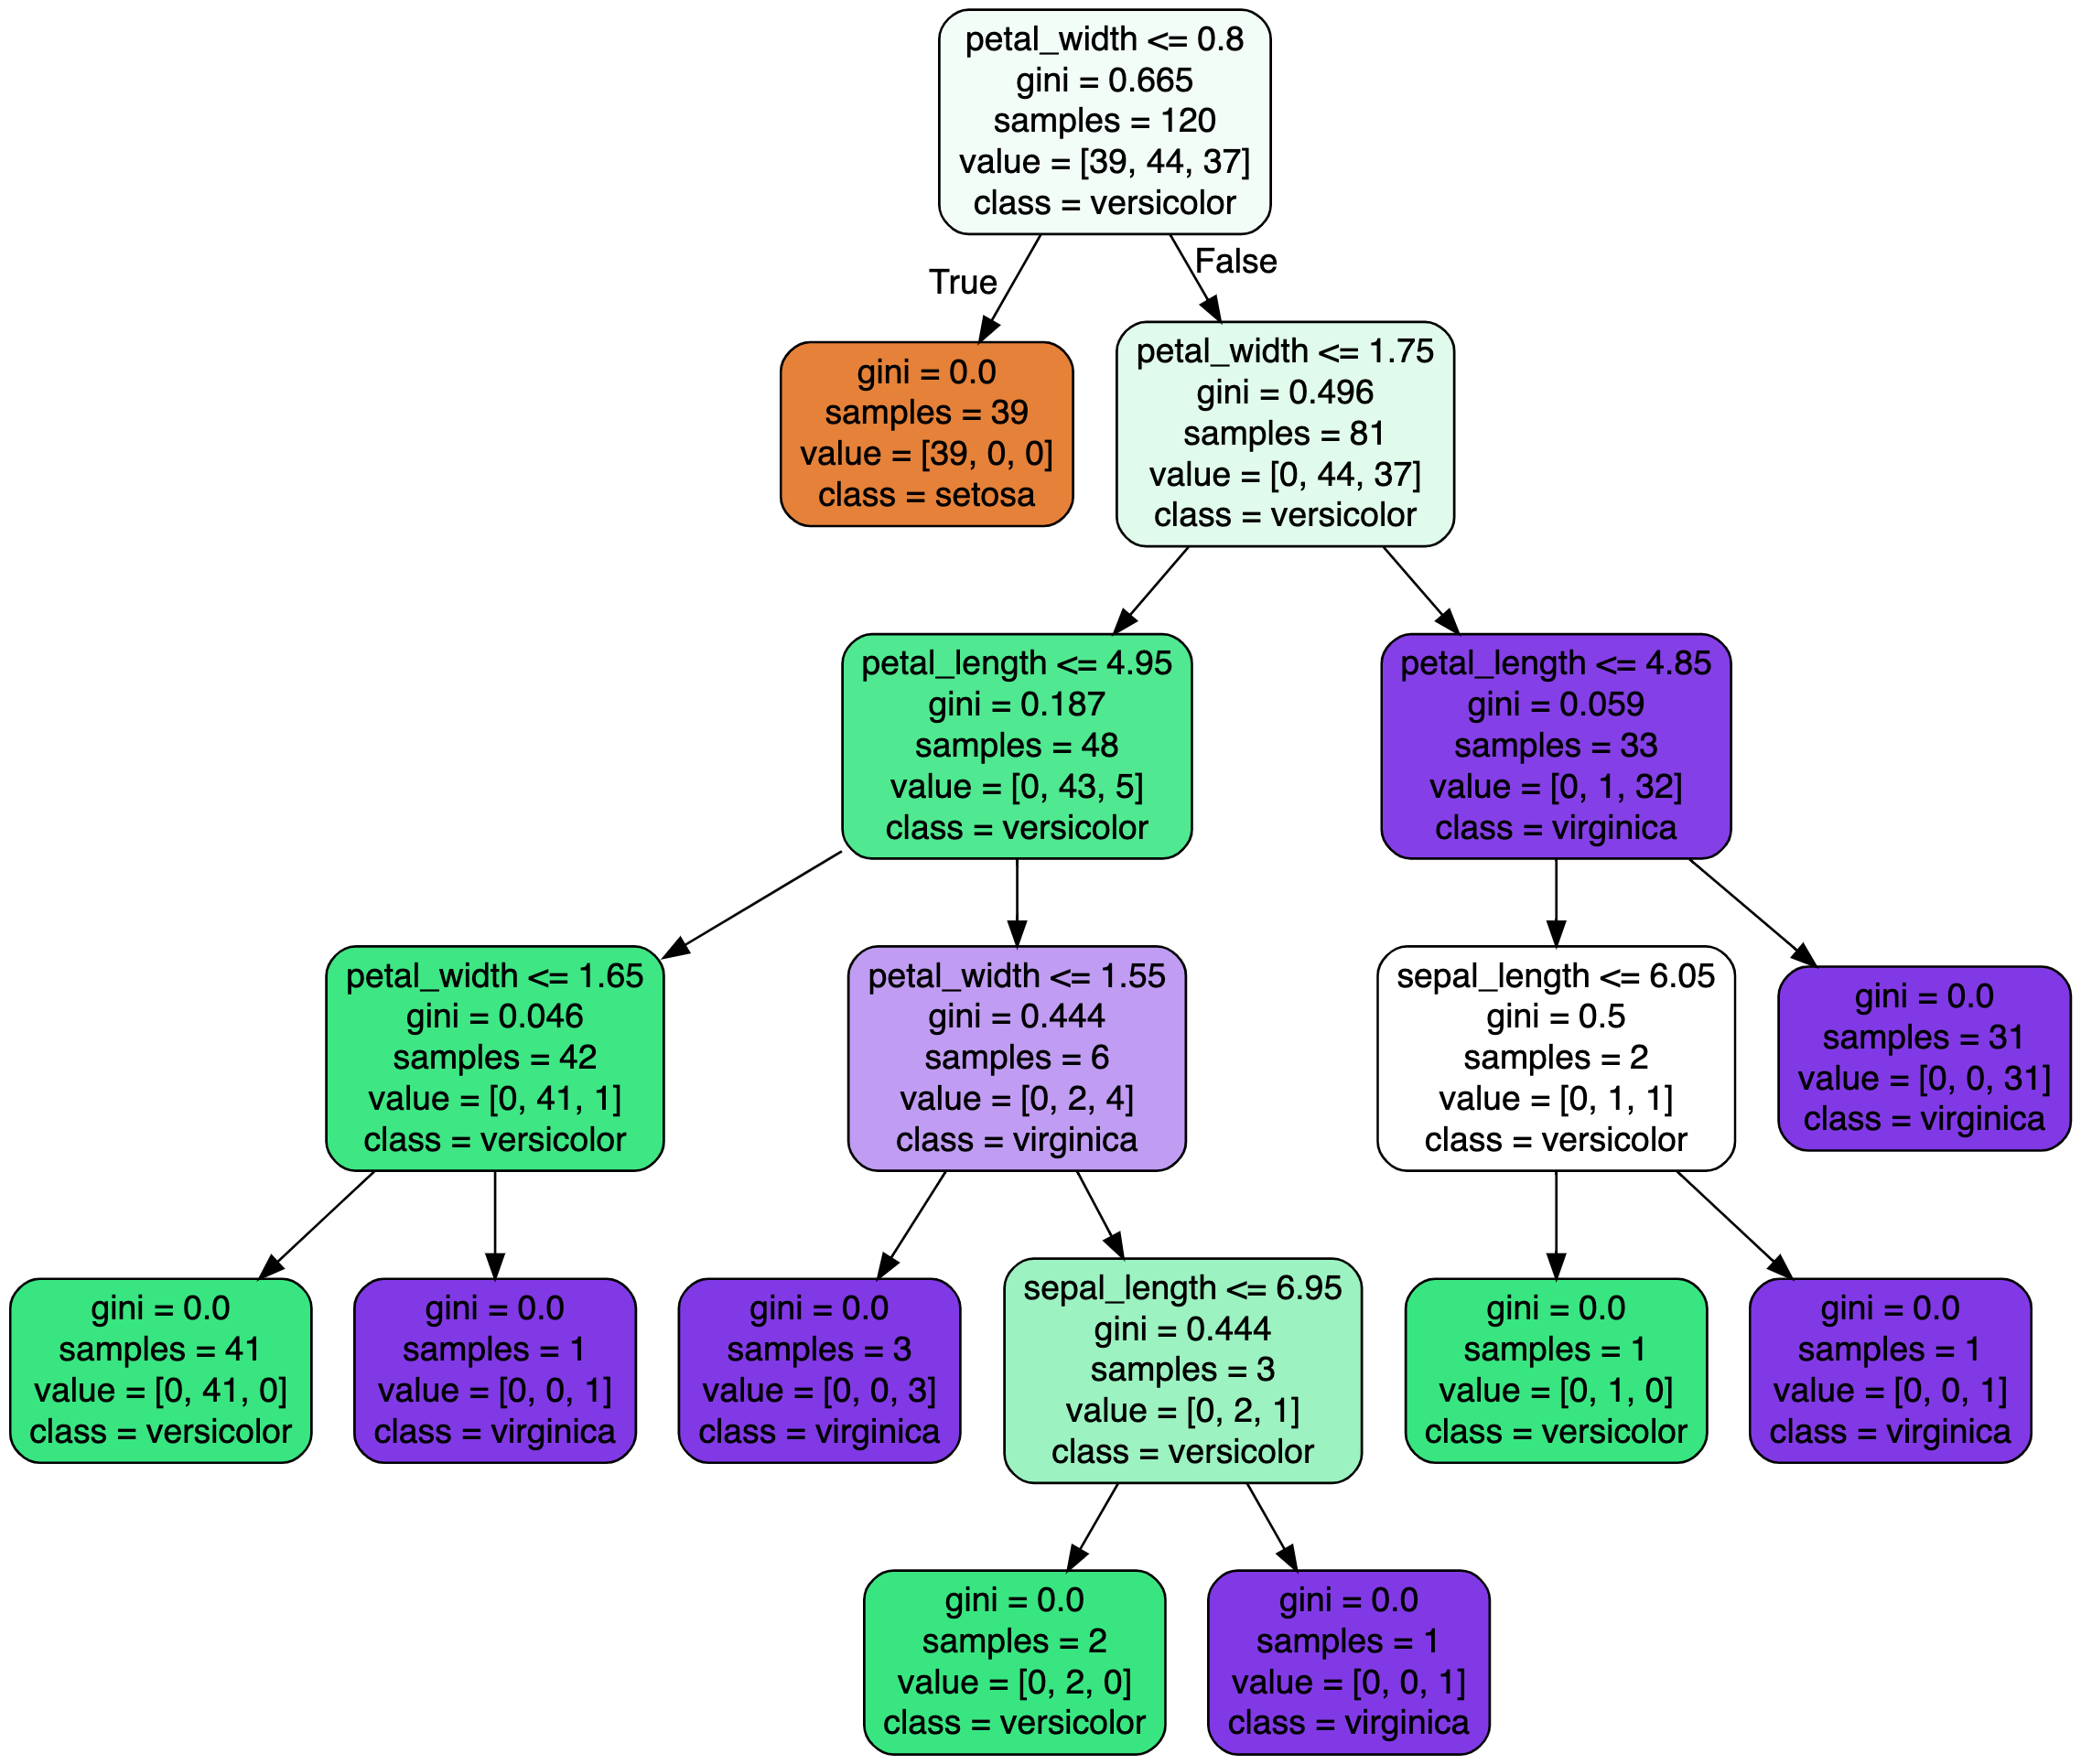

In [152]:
Image("graphviz.png")

## Best Performing Model

k-Nearest Neighbors (accuracy of 0.97)

## Advantages and Disadvantages

### Logistic Regression

**Advantages:** Efficient, easy to implement and interpret, and less prone to overfitting.

**Disadvantages:** Cannot predict continuous data and assumes normal distribution of data.

### k-Nearest Neighbors

**Advantages:** Can be used for classification and regression, does not rely on any assumptions, does not train on data.

**Disadvantages:** Does not work well with large datasets (slow) and cannot predict well if data is not evenly distributed.

### Decision Trees

**Advantages:** Does not require normal distribution of data and works well with labeled data.

**Disadvantages:** Easy to overfit data, cannot predict conitinuous values, expensive time and complexity.